In [52]:
!pip install numpy
!pip install matplotlib
!pip install tqdm

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from matplotlib.animation import FuncAnimation


In [60]:


class Particle():
    
    def __init__(self,r0,v0,a0,t,R,Id):
        
        self.dt=0.01
        self.r=r0
        self.v=v0
        self.a=a0
        self.R=R
        self.rV= np.zeros( (len(t),len(r0)) )
        self.vV= np.zeros( (len(t),len(v0)) )
        self.aV= np.zeros( (len(t),len(a0)) ) 
        self.Id= Id  
    
    def SetPosition(self,i,r):
        self.rV[i] = r
        
    def SetVelocity(self,i,v):
        self.vV[i] = v
        
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a

    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            if self.r[i] + self.R > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.R < - limits[i]:
                self.v[i] = - self.v[i]    
    
    def CheckWallLimits2(self,limits,dim=2):

        for i in range(dim):

            if self.r[i] + self.R > limits[i] and self.v[i]>0:
                self.v[i] = - self.v[i]*0.9
                #print(self.v[i])
            if self.r[i] - self.R < - limits[i] and self.v[i]<0:
                self.v[i] = - self.v[i]*0.9
                
    def GetPositionVector(self):
        return self.rV 
    
    def GetVelocityVector(self):
        return self.vV
    
    def GetR(self):
        return self.R
    
    def GetRPositionVector(self):
        return self.RrVector
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rV[0]]) # initial condition
        
        
        for i in range(1,len(self.rV)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rV[i]])
                
               # print(self.RrVector)
    def GetEnergy(self,it):
        Ep=(self.rV[it][1]+20)*9.8
        Ek=((self.vV[it][0])**2 + (self.vV[it][1])**2)*0.5
        return Ep+Ek



In [61]:
def ReduceTime(t,Particles,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


100%|██████████| 5001/5001 [00:00<00:00, 68492.13it/s]


El tiempo que se demora en dejar de rebortar es: 46.17


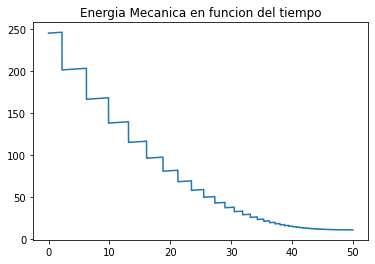

In [74]:
def punto1():
    
    t=np.arange(0,50.01,0.01)
    Limits = np.array([20.,20.])
    ro=np.array([-15.,5.])
    vo=np.array([1.,0.])
    ao=np.array([0.,-9.8])
    
    p=Particle(ro,vo,ao,t,1.,0)
    E=np.zeros(len(t))
    Tiempo=0
    for i in tqdm(range(len(t))):
    
        p.CheckWallLimits2(Limits)
        p.Evolution(i)
        E[i]=p.GetEnergy(i)
        if E[i]<=11 and Tiempo == 0: ### Se limita a 11 puesto que es el aproximado de la energia minima :3
            Tiempo=i*0.01
    print("El tiempo que se demora en dejar de rebortar es: "+str(Tiempo))
    redt=  ReduceTime(t,[p],10)
    plt.figure()
    plt.plot(t,E)
    plt.title("Energia Mecanica en funcion del tiempo")
punto1() 

100%|██████████| 3001/3001 [00:03<00:00, 877.33it/s]


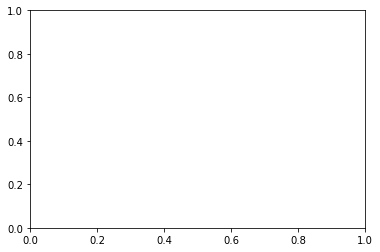

In [80]:
def Punto_2():
    t_lim= 30
    dt= 0.01
    t= np.arange(0,t_lim+dt,dt)
    N=100
    limits= np.array([10.,10.,10.])
    Limit= limits[0]
    Velocity= 50
    Particles= []

    for i in range(N):
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=3 )
        v0 = np.random.uniform( -Velocity, Velocity, size=3)
        a0 = np.zeros(3)
        p= Particle(x0,v0,a0,t,1.,i)

        Particles.append(p)

    for it in tqdm(range(len(t))):
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(limits,3)
            Particles[i].Evolution(it)

    redt= ReduceTime(t,Particles,10)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    def init():
        ax.set_xlim3d([-limits[0], limits[0]])
        ax.set_xlabel('X(m)')

        ax.set_ylim3d([-limits[1], limits[1]])
        ax.set_ylabel('Y(m)')

        ax.set_zlim3d([-limits[2], limits[2]])
        ax.set_zlabel('Z(m)')

    def Update(i):
    
        plot = ax.clear()
        init()
        plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
        for p in Particles:
            x = p.GetRPositionVector()[i,0]
            y = p.GetRPositionVector()[i,1]
            z = p.GetRPositionVector()[i,2]
                
            circle = plt.Circle( (x,y,z), p.GetR(), color='k', fill=False)
            plot = ax.add_patch(circle)
            plot = ax.plot(x,y,z,linestyle= "",color='r')
        
        return plot

    Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

    
Punto_2()
    
